In [14]:
#importing required libraries :
import pymongo
import json
import pprint

#connecting mongo client:
client = pymongo.MongoClient('mongodb://localhost:27017')

print(client.list_database_names()) #showing all database list of system:

#selecting database:
db = client['store_data']

['admin', 'config', 'local', 'store_data', 'test']


In [18]:
#creating collection import:
db.create_collection("import_data")

#creating collection export:
db.create_collection("export_data")

In [17]:
# db.get_collection("import_data").delete_many({})
# db.get_collection("export_data").delete_many({})

#for deleting all records from collections

In [19]:
#inserting export data into the collection export_data :

file=open("2018-2010_export.json")
file_export_data = json.load(file)

export_data = db.get_collection("export_data")
export_data.insert_many(file_export_data)

In [20]:
#inserting import data into the collection import_data :

file=open("2018-2010_import.json")
file_import_data = json.load(file)

import_data = db.get_collection("import_data")
import_data.insert_many(file_import_data)

In [21]:
#total no. of records in both collections :

print("import_data_records : ",import_data.count_documents({}))
print("export_data_records : ",export_data.count_documents({}))

import_data_records :  93095
export_data_records :  137023


# Analysis on imports of India from 2010 to 2018


In [24]:
#sample record
pprint.pprint(import_data.find_one())

{'Commodity': 'PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECIFIED OR INCLUDED.',
 'HSCode': 5,
 '_id': ObjectId('614c154c302e11e0a371944b'),
 'country': 'AFGHANISTAN TIS',
 'value_million_dollar': 0,
 'year': 2018}


In [49]:
#total no.of unique commodities,counties and its list 
print("Total unique commodities : ",len(import_data.distinct("Commodity")))
print("Total countries participated : ",len(import_data.distinct("country")))
# for i in import_data.distinct("Commodity"):
#     print(i)
for i in import_data.distinct("country"):
    print(i)

Total unique commodities :  98
Total countries participated :  242
AFGHANISTAN TIS
ALBANIA
ALGERIA
AMERI SAMOA
ANDORRA
ANGOLA
ANGUILLA
ANTARTICA
ANTIGUA
ARGENTINA
ARMENIA
ARUBA
AUSTRALIA
AUSTRIA
AZERBAIJAN
BAHAMAS
BAHARAIN IS
BANGLADESH PR
BARBADOS
BELARUS
BELGIUM
BELIZE
BENIN
BERMUDA
BHUTAN
BOLIVIA
BOSNIA-HRZGOVIN
BOTSWANA
BR VIRGN IS
BRAZIL
BRUNEI
BULGARIA
BURKINA FASO
BURUNDI
C AFRI REP
CAMBODIA
CAMEROON
CANADA
CAPE VERDE IS
CAYMAN IS
CHAD
CHANNEL IS
CHILE
CHINA P RP
CHRISTMAS IS.
COCOS IS
COLOMBIA
COMOROS
CONGO D. REP.
CONGO P REP
COOK IS
COSTA RICA
COTE D' IVOIRE
CROATIA
CUBA
CYPRUS
CZECH REPUBLIC
DENMARK
DJIBOUTI
DOMINIC REP
DOMINICA
ECUADOR
EGYPT A RP
EL SALVADOR
EQUTL GUINEA
ERITREA
ESTONIA
ETHIOPIA
FALKLAND IS
FAROE IS.
FIJI IS
FINLAND
FR GUIANA
FR POLYNESIA
FR S ANT TR
FRANCE
GABON
GAMBIA
GEORGIA
GERMANY
GHANA
GIBRALTAR
GREECE
GREENLAND
GRENADA
GUADELOUPE
GUAM
GUATEMALA
GUERNSEY
GUINEA
GUINEA BISSAU
GUYANA
HAITI
HEARD MACDONALD
HONDURAS
HONG KONG
HUNGARY
ICELAND
INDONESIA
IRA

{'_id': 2015, 'value': 412537.53}
{'_id': 2018, 'value': 1028142.66}
{'_id': 2017, 'value': 931148.04}
{'_id': 2013, 'value': 450192.99}
{'_id': 2012, 'value': 490730.07}
{'_id': 2016, 'value': 384350.29}
{'_id': 2011, 'value': 489311.81}
{'_id': 2014, 'value': 448026.63}
{'_id': 2010, 'value': 369762.25}


<BarContainer object of 9 artists>

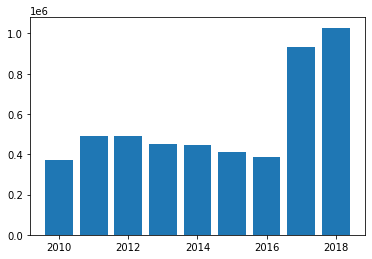

In [42]:
#count year-wise import_cost  
import matplotlib.pyplot as plt
yearwise_cost = import_data.aggregate(
    [{"$group" : 
      {"_id":"$year",
       "value":{"$sum":"$value_million_dollar"}
      }}
    ])
years=[]
cost=[]
for i in yearwise_cost:
    years.append(i['_id'])
    cost.append(i['value'])
    print(i)
    

plt.bar(years, cost)

Country :  ARMENIA , value :  49.37
Country :  EL SALVADOR , value :  78.96
Country :  GREENLAND , value :  0.41000000000000003
Country :  NETHERLANDANTIL , value :  223.68
Country :  MARSHALL ISLAND , value :  29.65
Country :  U K , value :  63479.69
Country :  VENEZUELA , value :  89129.03
Country :  ETHIOPIA , value :  506.11
Country :  MONTENEGRO , value :  1.5499999999999998
Country :  UNION OF SERBIA & MONTENEGRO , value :  42.36
Country :  CONGO P REP , value :  3277.65
Country :  FINLAND , value :  13899.06
Country :  ERITREA , value :  458.59
Country :  GRENADA , value :  1.56
Country :  GUINEA , value :  4324.37
Country :  MONGOLIA , value :  51.96
Country :  ROMANIA , value :  3756.35
Country :  NIGERIA , value :  123793.06
Country :  FR POLYNESIA , value :  0.26
Country :  YEMEN REPUBLC , value :  5337.66
Country :  MOROCCO , value :  11705.47
Country :  MYANMAR , value :  10812.31
Country :  NICARAGUA , value :  29.5
Country :  SLOVAK REP , value :  867.6
Country :  BANGLA

<BarContainer object of 5 artists>

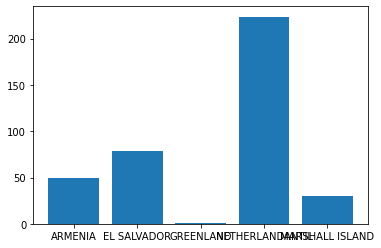

In [55]:
#count country-wise import_cost  
import matplotlib.pyplot as plt
countrywise_cost = import_data.aggregate(
    [{"$group" : 
      {"_id":"$country",
       "value":{"$sum":"$value_million_dollar"}
      }}
    ])
countries=[]
cost2=[]
for i in countrywise_cost:
    countries.append(i['_id'])
    cost2.append(i['value'])
    print("Country : ",i['_id'],", value : ",i['value'])
    

plt.bar(countries[0:5], cost2[0:5])
